# Digitalisation in the European Union

In this notebook and analysis we will be using the following packages:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In this notebook we will calculate the correlation for gender equality, age and internet infrasctructure.

# 1. Overview of datasets

- total_df = Digital Skills 2023. This includes information of Gender Equality Index. (df_ds_geidx_m_f_total.xlsx).
- age_group_df = Share of people with above basic skills per country and age group. (agegroup.xlsx)
- abstract_df = Includes information of internet infrastructure (5G and NGA), digital skills per country and in rural areas, and share of people with above digital skills.

Let's read the first dataset: Digital Skills 2023

In [13]:
total_df = pd.read_excel('./df_ds_geidx_m_f_total.xlsx')
total_df.head()

,Countries,4n5_m_16-24,4n5_f_16-24,4n5_m_25-34,4n5_f_25-34,4n5_m_35-44,4n5_f_35-44,4n5_m_45-54,4n5_f_45-54,4n5_m_55-64,...,0_f_65-74,0_m_edu_low,0_f_edu_low,0_m_edu_medium,0_f_edu_medium,0_m_edu_high,0_f_edu_high,GE-idx,5_f_total,5_m_total
0,EU,67.93,72.16,69.29,71.07,64.25,66.28,58.20,57.31,46.50,...,6.59,5.76,6.47,3.06,2.83,0.59,0.56,70.2,25.40,29.30
1,Belgium,62.19,73.34,71.69,72.98,73.87,63.47,58.32,57.64,53.00,...,6.16,5.46,4.71,1.20,2.46,0.40,1.01,76.0,25.83,30.71
2,Bulgaria,52.53,53.81,48.82,49.58,46.25,50.25,39.39,45.06,19.37,...,6.60,14.64,14.40,5.53,4.71,0.77,1.06,65.1,7.66,7.81
3,Czechia,90.19,95.13,86.97,83.99,82.67,83.16,71.74,72.64,56.14,...,3.05,1.41,3.12,1.25,1.15,0.51,0.07,57.9,34.96,36.04
4,Denmark,76.03,82.38,81.76,81.24,74.02,73.74,74.80,67.94,63.71,...,2.29,2.13,1.19,0.60,0.66,0.12,0.25,77.8,33.57,45.13


In [14]:
total_df.shape #n° of rows and columns

(28, 130)

In [15]:
list(total_df.columns) #we used here the function list to get all name of columns

['Countries',
 '4n5_m_16-24',
 '4n5_f_16-24',
 '4n5_m_25-34',
 '4n5_f_25-34',
 '4n5_m_35-44',
 '4n5_f_35-44',
 '4n5_m_45-54',
 '4n5_f_45-54',
 '4n5_m_55-64',
 '4n5_f_55-64',
 '4n5_m_65-74',
 '4n5_f_65-74',
 '4n5_m_edu_low',
 '4n5_f_edu_low',
 '4n5_m_edu_medium',
 '4n5_f_edu_medium',
 '4n5_m_edu_high',
 '4n5_f_edu_high',
 '5_m_16-24',
 '5_f_16-24',
 '5_m_25-34',
 '5_f_25-34',
 '5_m_35-44',
 '5_f_35-44',
 '5_m_45-54',
 '5_f_45-54',
 '5_m_55-64',
 '5_f_55-64',
 '5_m_65-74',
 '5_f_65-74',
 '5_m_edu_low',
 '5_f_edu_low',
 '5_m_edu_medium',
 '5_f_edu_medium',
 '5_m_edu_high',
 '5_f_edu_high',
 '4_m_16-24',
 '4_f_16-24',
 '4_m_25-34',
 '4_f_25-34',
 '4_m_35-44',
 '4_f_35-44',
 '4_m_45-54',
 '4_f_45-54',
 '4_m_55-64',
 '4_f_55-64',
 '4_m_65-74',
 '4_f_65-74',
 '4_m_edu_low',
 '4_f_edu_low',
 '4_m_edu_medium',
 '4_f_edu_medium',
 '4_m_edu_high',
 '4_f_edu_high',
 '3_m_16-24',
 '3_f_16-24',
 '3_m_25-34',
 '3_f_25-34',
 '3_m_35-44',
 '3_f_35-44',
 '3_m_45-54',
 '3_f_45-54',
 '3_m_55-64',
 '3_f_55

# 2. Correlation: Gender Equality Index

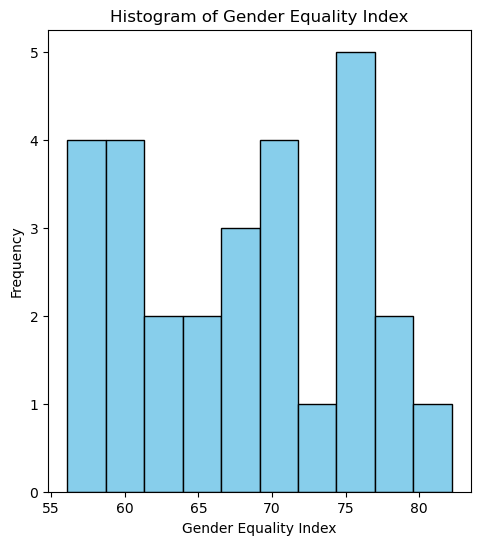

In [16]:
#check if the Gender Equality Index Score has a normal distribution:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) 
plt.hist(total_df['GE-idx'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Gender Equality Index')
plt.xlabel('Gender Equality Index')
plt.ylabel('Frequency')
plt.show()

The gender equality index has a non-linear relationship. Therefore, we can calculate its correlation with Spearman function:

In [17]:
#correlation and p-value only women and gender equality
correlation_geidx, p_value_geidx = spearmanr(total_df['5_f_total'], total_df['GE-idx'])
print(f'Spearman Correlation for gender equality: {correlation_geidx}')
print(f'P-value for gender equality index: {p_value_geidx}')

Spearman Correlation for gender equality: 0.47954017145391437
P-value for gender equality index: 0.009818373308971012


# 3. Correlation: Age groups

For this, we will be using a new file which has information about the percentages of people with above basic digital skills per country per age group

In [18]:
age_group_df = pd.read_excel('agegroup.xlsx')
age_group_df.head()

,Country,y16_24,y25_34,y35_44,y45_54,y55_64,y65_74
0,Austria,41.69,40.06,42.09,31.96,23.84,11.06
1,Belgium,32.99,42.93,34.44,27.24,18.06,12.61
2,Bulgaria,12.30,13.32,11.13,9.46,3.06,0.26
3,Croatia,34.41,47.46,45.02,21.89,8.67,2.74
4,Cyprus,31.97,35.22,31.92,25.28,13.53,2.68


In [19]:
age_group_df.shape

(27, 7)

In [20]:
age_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  27 non-null     object 
 1   y16_24   27 non-null     float64
 2   y25_34   27 non-null     float64
 3   y35_44   27 non-null     float64
 4   y45_54   27 non-null     float64
 5   y55_64   27 non-null     float64
 6   y65_74   27 non-null     float64
dtypes: float64(6), object(1)
memory usage: 1.6+ KB


## 3.1 Plotting the data

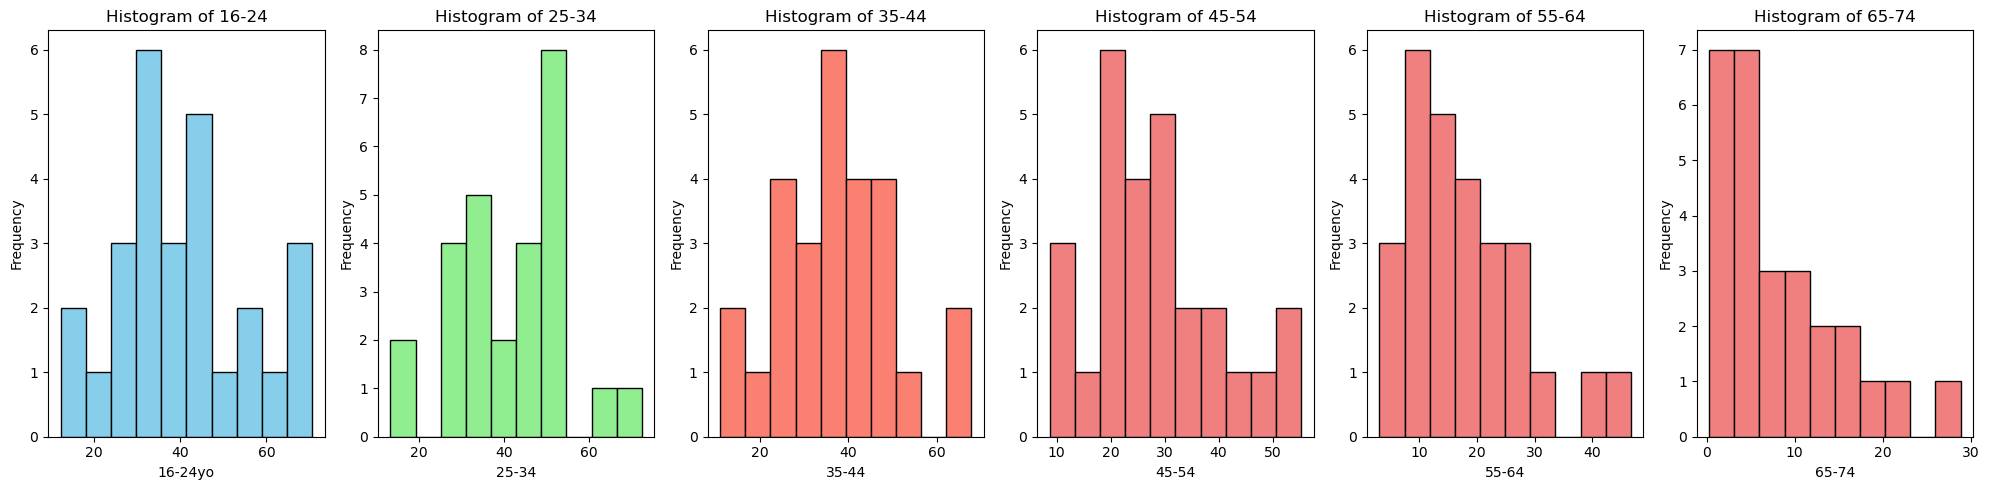

In [21]:
#lets get the distributions of the data
plt.figure(figsize=(20, 5))

plt.subplot(1, 6, 1)  # 1 row, 3 columns, 1st subplot
plt.hist(age_group_df['y16_24'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of 16-24')
plt.xlabel('16-24yo')
plt.ylabel('Frequency')


#25-34
plt.subplot(1, 6, 2)  # 1 row, 2 columns, 2st subplot
plt.hist(age_group_df['y25_34'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of 25-34')
plt.xlabel('25-34')
plt.ylabel('Frequency')


# 35-44
plt.subplot(1, 6, 3)  # 1 row, 3 columns, 3rd subplot
plt.hist(age_group_df['y35_44'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of 35-44')
plt.xlabel('35-44')
plt.ylabel('Frequency')


#45-54
plt.subplot(1, 6, 4)  # 2 row, 1 columns, 4th subplot
plt.hist(age_group_df['y45_54'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Histogram of 45-54')
plt.xlabel('45-54')
plt.ylabel('Frequency')


#55-64
plt.subplot(1, 6, 5)  # 1 row, 4 columns, 4th subplot
plt.hist(age_group_df['y55_64'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Histogram of 55-64')
plt.xlabel('55-64')
plt.ylabel('Frequency')


#65-74
plt.subplot(1, 6, 6)  # 1 row, 4 columns, 4th subplot
plt.hist(age_group_df['y65_74'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Histogram of 65-74')
plt.xlabel('65-74')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 3.2 Checking for normality

I want to confirm further if the data is normally distributed. For this, I will be using the Shapiro-Wilk test.

In [22]:
#16-24yo
statistic, p_value_test = stats.shapiro(age_group_df['y16_24'])

print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"p-value: {p_value_test}")
if p_value_test > 0.05:
    print("The data appears to be normally distributed")
else:
    print("The data does not appear to be normally distributed")

Shapiro-Wilk test statistic: 0.9635897960072065
p-value: 0.44442728849234375
The data appears to be normally distributed


In [23]:
#25-34yo
statistic, p_value_test = stats.shapiro(age_group_df['y25_34'])

print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"p-value: {p_value_test}")
if p_value_test > 0.05:
    print("The data appears to be normally distributed")
else:
    print("The data does not appear to be normally distributed")

Shapiro-Wilk test statistic: 0.9670645103411035
p-value: 0.5264208717321043
The data appears to be normally distributed


In [24]:
#35-44yo
statistic, p_value_test = stats.shapiro(age_group_df['y35_44'])

print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"p-value: {p_value_test}")
if p_value_test > 0.05:
    print("The data appears to be normally distributed")
else:
    print("The data does not appear to be normally distributed")

Shapiro-Wilk test statistic: 0.9662907282051713
p-value: 0.507409375381128
The data appears to be normally distributed


In [25]:
#45-54yo
statistic, p_value_test = stats.shapiro(age_group_df['y45_54'])

print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"p-value: {p_value_test}")
if p_value_test > 0.05:
    print("The data appears to be normally distributed")
else:
    print("The data does not appear to be normally distributed")

Shapiro-Wilk test statistic: 0.9478104895000659
p-value: 0.18961364960800042
The data appears to be normally distributed


In [26]:
#55-64yo
statistic, p_value_test = stats.shapiro(age_group_df['y55_64'])

print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"p-value: {p_value_test}")
if p_value_test > 0.05:
    print("The data appears to be normally distributed")
else:
    print("The data does not appear to be normally distributed")

Shapiro-Wilk test statistic: 0.9340487741269361
p-value: 0.08690452526647457
The data appears to be normally distributed


In [27]:
#65-74yo
statistic, p_value_test = stats.shapiro(age_group_df['y65_74'])

print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"p-value: {p_value_test}")
if p_value_test > 0.05:
    print("The data appears to be normally distributed")
else:
    print("The data does not appear to be normally distributed")

Shapiro-Wilk test statistic: 0.8906668176653915
p-value: 0.008233075680643609
The data does not appear to be normally distributed


The last age group seems to be not normally distributed. We are going to fix that and normalise it:

In [28]:
age_group_df['y65_74_log'] = np.log(age_group_df['y65_74'])

Now we use the Shapiro-Wilk test to check if this worked:

In [29]:
statistic, p_value_test = stats.shapiro(age_group_df['y65_74_log'])

print(f"Shapiro-Wilk test statistic: {statistic}")
print(f"p-value: {p_value_test}")
if p_value_test > 0.05:
    print("The data appears to be normally distributed")
else:
    print("The data does not appear to be normally distributed")

Shapiro-Wilk test statistic: 0.9437518464505434
p-value: 0.15076427333853304
The data appears to be normally distributed


Now that all data points are normally distributed, we can use the pearson correlation functions. For this, we will read in another dataset showing the share of people with advanced digital skills per country so we can compare them and check for correlation.

In [30]:
abstract_df = pd.read_excel('abstract.xlsx')
abstract_df.head()

,Country,5G_total_23,5G_rural_23,nga_rural,nga_total,rural_ds,city_ds,5_f_total,5_m_total,total_ds,GE-idx
0,Austria,79.1,41.5,71.1,94.2,27.15,32.18,28.02,36.09,32.055,71.2
1,Belgium,14.2,3.8,93.6,99.6,25.97,27.98,25.83,30.71,28.270,76.0
2,Bulgaria,45.1,11.3,82.3,95.8,4.04,4.44,7.66,7.81,7.735,65.1
3,Croatia,40.0,8.0,56.9,89.0,20.00,28.09,23.16,26.89,25.025,60.7
4,Cyprus,35.0,28.0,100.0,100.0,23.34,31.62,24.57,25.36,24.965,60.7


In [31]:
# Calculate Pearson correlation and p-values
correlation, p_value = stats.pearsonr(age_group_df['y16_24'], abstract_df['total_ds'])
print(f"Correlation between age 16-24 and total_ds: {correlation}, p-value: {p_value}")

correlation, p_value = stats.pearsonr(age_group_df['y25_34'], abstract_df['total_ds'])
print(f"Correlation between age 25-34 and total_ds: {correlation}, p-value: {p_value}")

correlation, p_value = stats.pearsonr(age_group_df['y35_44'], abstract_df['total_ds'])
print(f"Correlation between age 35-44 and total_ds: {correlation}, p-value: {p_value}")

correlation, p_value = stats.pearsonr(age_group_df['y45_54'], abstract_df['total_ds'])
print(f"Correlation between age 45-54 and total_ds: {correlation}, p-value: {p_value}")

correlation, p_value = stats.pearsonr(age_group_df['y55_64'], abstract_df['total_ds'])
print(f"Correlation between age 55-64 and total_ds: {correlation}, p-value: {p_value}")

correlation, p_value = stats.pearsonr(age_group_df['y65_74'], abstract_df['total_ds'])
print(f"Correlation between age 65-74 and total_ds: {correlation}, p-value: {p_value}")



Correlation between age 16-24 and total_ds: 0.8528308482342208, p-value: 1.6127739613541437e-08
Correlation between age 25-34 and total_ds: 0.9437048792987602, p-value: 1.6240504401782467e-13
Correlation between age 35-44 and total_ds: 0.9555456572756551, p-value: 9.049706769282355e-15
Correlation between age 45-54 and total_ds: 0.9791250737507781, p-value: 8.0970500977327e-19
Correlation between age 55-64 and total_ds: 0.929938067206334, p-value: 2.3201198981146473e-12
Correlation between age 65-74 and total_ds: 0.8273526457236209, p-value: 1.0258264406380495e-07


Next, we want to check for all age groups

In [32]:
age_group_columns = ['y16_24', 'y25_34', 'y35_44', 'y45_54', 'y55_64', 'y65_74']

In [33]:
# Assign numbers to age groups (younger gets lower numbers)
age_group_map = {'y16_24': 1, 'y25_34': 2, 'y35_44': 3, 'y45_54': 4, 'y55_64': 5, 'y65_74': 6}

df_age_skills = age_group_df[age_group_columns].mean()
df_age_mapped = pd.Series(age_group_map)

In [34]:
correlation_age_skills, p_value_age = pearsonr(df_age_mapped, df_age_skills)

# Print the correlation and p-value
print('Correlation between age and digital skills:', correlation_age_skills)
print('P-value for the correlation:', p_value_age)

Correlation between age and digital skills: -0.9532315457180544
P-value for the correlation: 0.003229784427081319


# 4. Correlation: Internet Infrastructure

We have divided the internet infrastructure into two groups: nga (next generation access = Fiber and Cable) and 5G (3.4-3.8 GHz).

## 4.1 Plotting the data

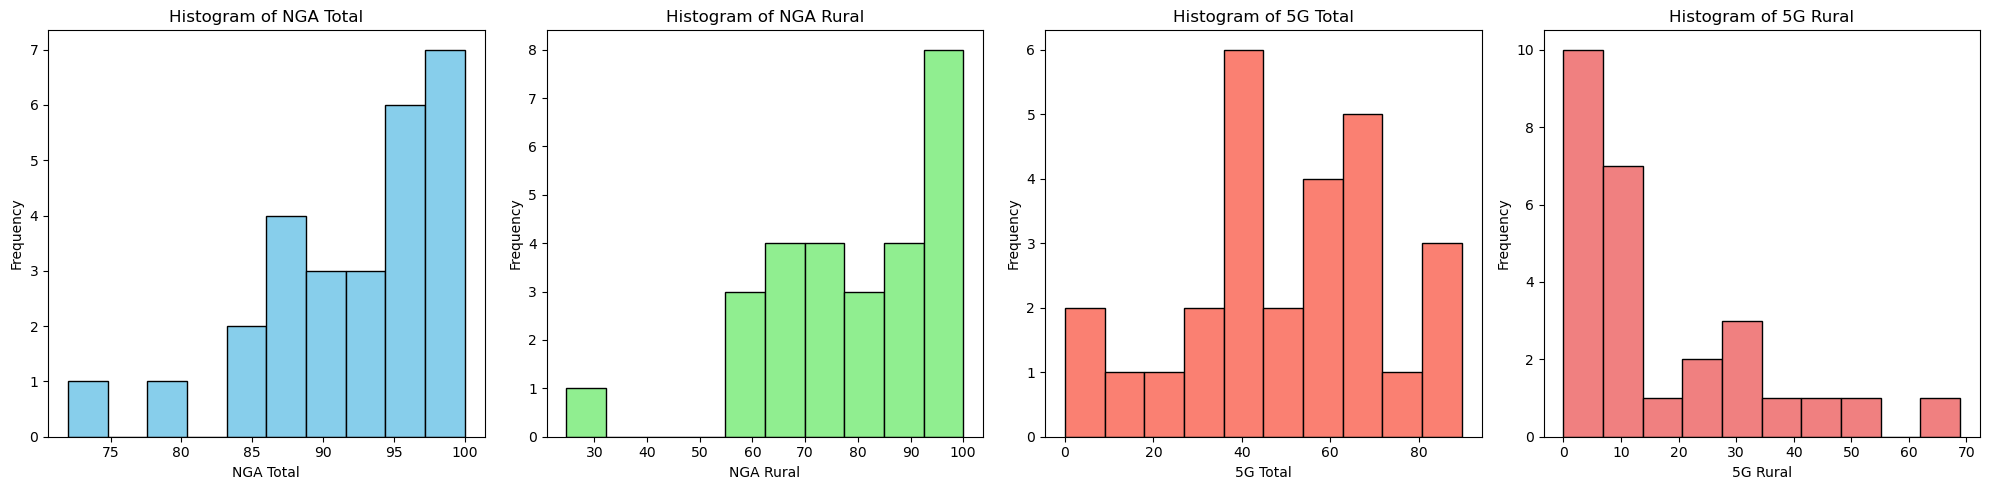

In [35]:
#lets get the distributions of the data
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)  # 1 row, 4 columns, 1st subplot
plt.hist(abstract_df['nga_total'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of NGA Total')
plt.xlabel('NGA Total')
plt.ylabel('Frequency')
###left-skewed distribution

#NGA Rural
plt.subplot(1, 4, 2)  # 1 row, 4 columns, 2st subplot
plt.hist(abstract_df['nga_rural'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of NGA Rural')
plt.xlabel('NGA Rural')
plt.ylabel('Frequency')
## left-skewed distribution

# 5G Total
plt.subplot(1, 4, 3)  # 1 row, 4 columns, 3rd subplot
plt.hist(abstract_df['5G_total_23'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of 5G Total')
plt.xlabel('5G Total')
plt.ylabel('Frequency')
###slightly left--skewed distribution

#5G Rural
plt.subplot(1, 4, 4)  # 1 row, 4 columns, 4th subplot
plt.hist(abstract_df['5G_rural_23'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Histogram of 5G Rural')
plt.xlabel('5G Rural')
plt.ylabel('Frequency')
###right-skewed distribution

plt.tight_layout()
plt.show()

## 4.2 Normality

In [36]:
#since the data is skewed, next step is to normalize the data:

# Apply log transformation (adding a small value to avoid log(0))
abstract_df['log_nga_total'] = np.log1p(abstract_df['nga_total'])  # log(nga_total + 1)
abstract_df['log_nga_rural'] = np.log1p(abstract_df['nga_rural'])
abstract_df['log_5g_total'] = np.log1p(abstract_df['5G_total_23'])
abstract_df['log_5g_rural'] = np.log1p(abstract_df['5G_rural_23'])


In [37]:
# Calculate Pearson correlation and p-values
correlation, p_value = stats.pearsonr(abstract_df['log_nga_total'], abstract_df['total_ds'])
print(f"Correlation between log_nga_total and total_ds: {correlation}, p-value: {p_value}")

correlation, p_value = stats.pearsonr(abstract_df['log_nga_rural'], abstract_df['rural_ds'])
print(f"Correlation between log_nga_rural and rural_ds: {correlation}, p-value: {p_value}")

correlation, p_value = stats.pearsonr(abstract_df['log_5g_total'], abstract_df['total_ds'])
print(f"Correlation between log_5g_total and total_ds: {correlation}, p-value: {p_value}")

correlation, p_value = stats.pearsonr(abstract_df['log_5g_rural'], abstract_df['rural_ds'])
print(f"Correlation between log_5g_rural and rural_ds: {correlation}, p-value: {p_value}")


Correlation between log_nga_total and total_ds: 0.08806554692966101, p-value: 0.6622569273213584
Correlation between log_nga_rural and rural_ds: 0.2942739499627867, p-value: 0.1362356420344954
Correlation between log_5g_total and total_ds: -0.10439500498713389, p-value: 0.6043160316035138
Correlation between log_5g_rural and rural_ds: 0.20291462813078734, p-value: 0.3100611156530327


# 5. Summary and Conclusion

As a summary for our initial questions:
1. Do countries with higher gender equality also have higher digital skills among women? The data suggests that there is a  correlation (0.5, p value = 0.0098) between gender equality and percentage of women with advanced digital skills. 
2. Are young people better digitally skilled? The results show that there is a negative correlation (-0.9532, p value = 0.0032) between age and percentage of people with advanced digital skills.
3. Do people in countries with a better internet access also show more advanced digital skills? Our current analysis did not find any direct nor significant correlation between internet access and digital skills. A factor we could further consider is the price of this technology per country.